In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from time import time
import matplotlib.patches as mpatches

In [20]:
data = pd.read_csv('usairport.tsv', sep=' ', index_col=False, dtype=str)

In [22]:
data.values[:10].astype(float)

array([[1.0000e+00, 3.0000e+00, 7.0000e+00],
       [4.0000e+00, 5.0000e+00, 3.0000e+00],
       [6.0000e+00, 7.0000e+00, 5.0000e+00],
       [6.0000e+00, 8.0000e+00, 1.4137e+04],
       [9.0000e+00, 1.0000e+01, 8.0000e+00],
       [1.1000e+01, 2.0000e+00, 8.0000e+00],
       [1.2000e+01, 5.0000e+00, 4.1300e+02],
       [1.3000e+01, 1.4000e+01, 2.0000e+00],
       [1.3000e+01, 1.5000e+01, 2.0000e+00],
       [1.6000e+01, 1.7000e+01, 2.0000e+00]])

In [23]:
X = data.values.astype(float)

In [28]:
perplexities = [5, 20, 50, 100]
metrics = ['euclidean', 'manhattan', 'cosine']
iterations = [1000, 3000, 5000]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 28235 samples in 0.016s...
[t-SNE] Computed neighbors for 28235 samples in 0.305s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28235
[t-SNE] Computed conditional probabilities for sample 2000 / 28235
[t-SNE] Computed conditional probabilities for sample 3000 / 28235
[t-SNE] Computed conditional probabilities for sample 4000 / 28235
[t-SNE] Computed conditional probabilities for sample 5000 / 28235
[t-SNE] Computed conditional probabilities for sample 6000 / 28235
[t-SNE] Computed conditional probabilities for sample 7000 / 28235
[t-SNE] Computed conditional probabilities for sample 8000 / 28235
[t-SNE] Computed conditional probabilities for sample 9000 / 28235
[t-SNE] Computed conditional probabilities for sample 10000 / 28235
[t-SNE] Computed conditional probabilities for sample 11000 / 28235
[t-SNE] Computed conditional probabilities for sample 12000 / 28235
[t-SNE] Computed conditional probabilities for sam

[t-SNE] Iteration 950: error = 1.2558793, gradient norm = 0.0000805 (50 iterations in 17.548s)
[t-SNE] Iteration 1000: error = 1.2123193, gradient norm = 0.0000734 (50 iterations in 16.909s)
[t-SNE] KL divergence after 1000 iterations: 1.212319
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 28235 samples in 0.015s...
[t-SNE] Computed neighbors for 28235 samples in 1.553s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28235
[t-SNE] Computed conditional probabilities for sample 2000 / 28235
[t-SNE] Computed conditional probabilities for sample 3000 / 28235
[t-SNE] Computed conditional probabilities for sample 4000 / 28235
[t-SNE] Computed conditional probabilities for sample 5000 / 28235
[t-SNE] Computed conditional probabilities for sample 6000 / 28235
[t-SNE] Computed conditional probabilities for sample 7000 / 28235
[t-SNE] Computed conditional probabilities for sample 8000 / 28235
[t-SNE] Computed conditional probabilities for sample 9000 / 28235
[t-SNE] 

[t-SNE] Iteration 850: error = 0.8712357, gradient norm = 0.0000651 (50 iterations in 25.847s)
[t-SNE] Iteration 900: error = 0.8472618, gradient norm = 0.0000578 (50 iterations in 26.012s)
[t-SNE] Iteration 950: error = 0.8265899, gradient norm = 0.0000517 (50 iterations in 25.818s)
[t-SNE] Iteration 1000: error = 0.8087959, gradient norm = 0.0000466 (50 iterations in 26.150s)
[t-SNE] KL divergence after 1000 iterations: 0.808796


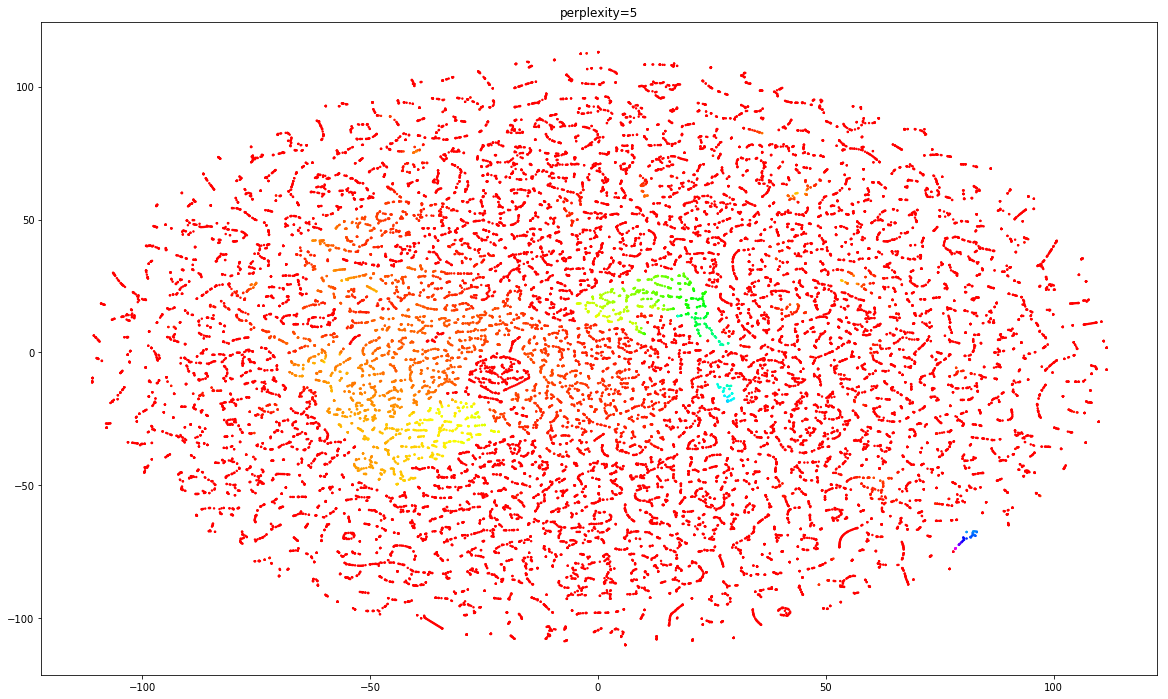

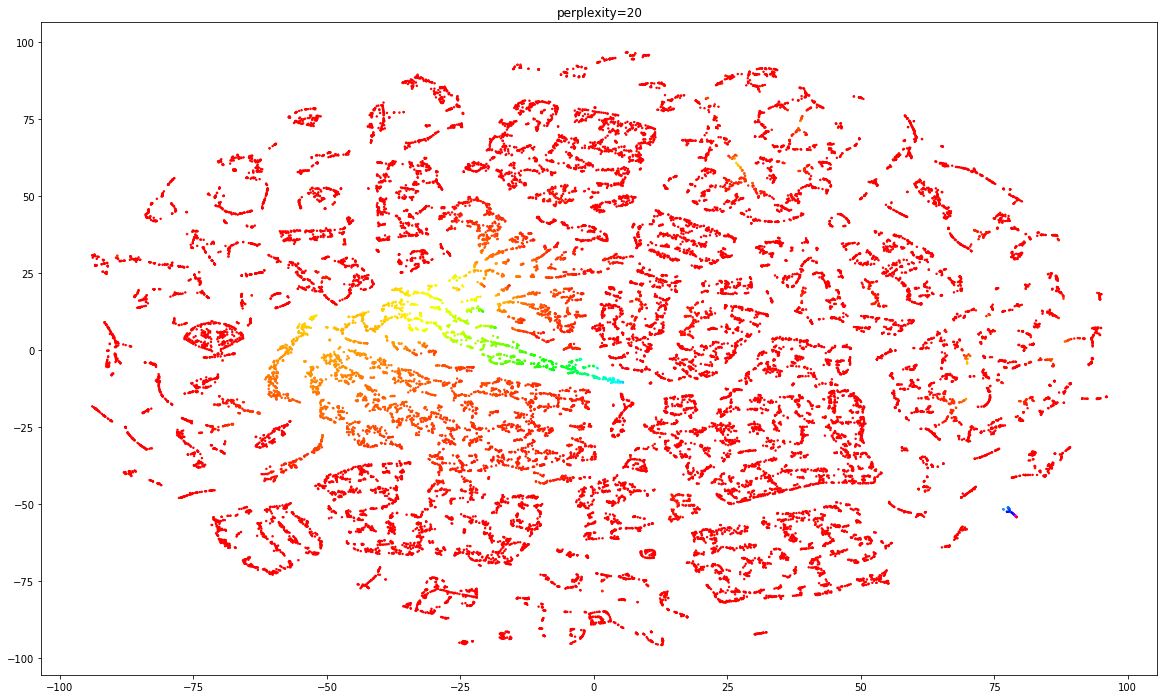

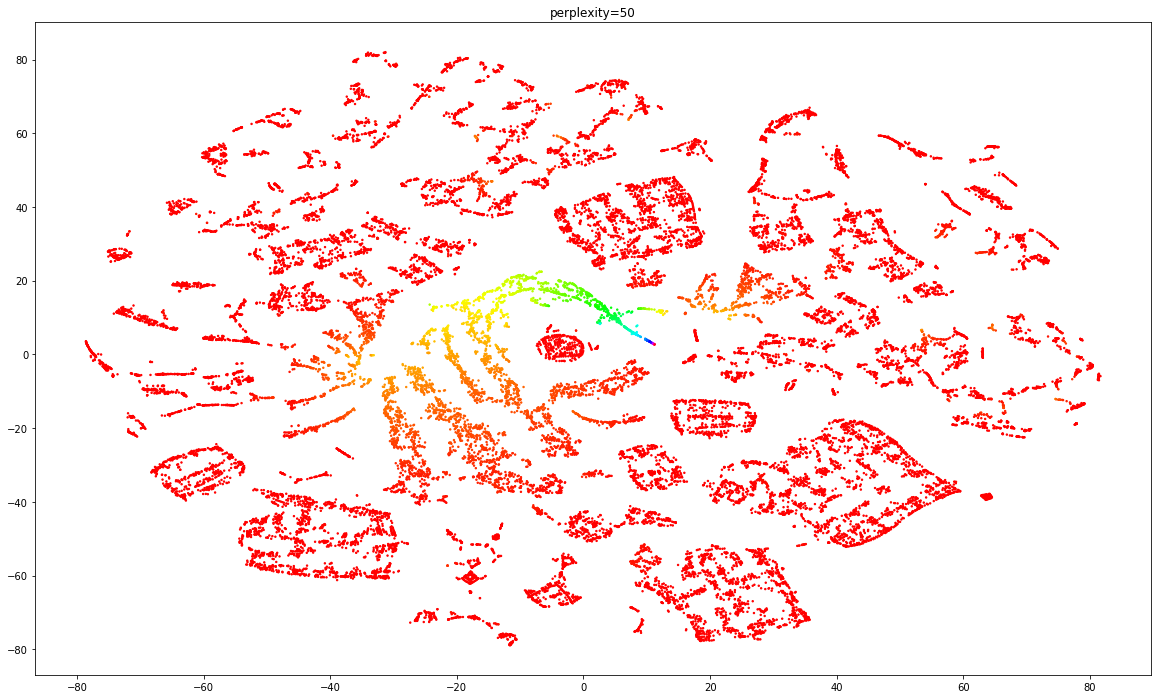

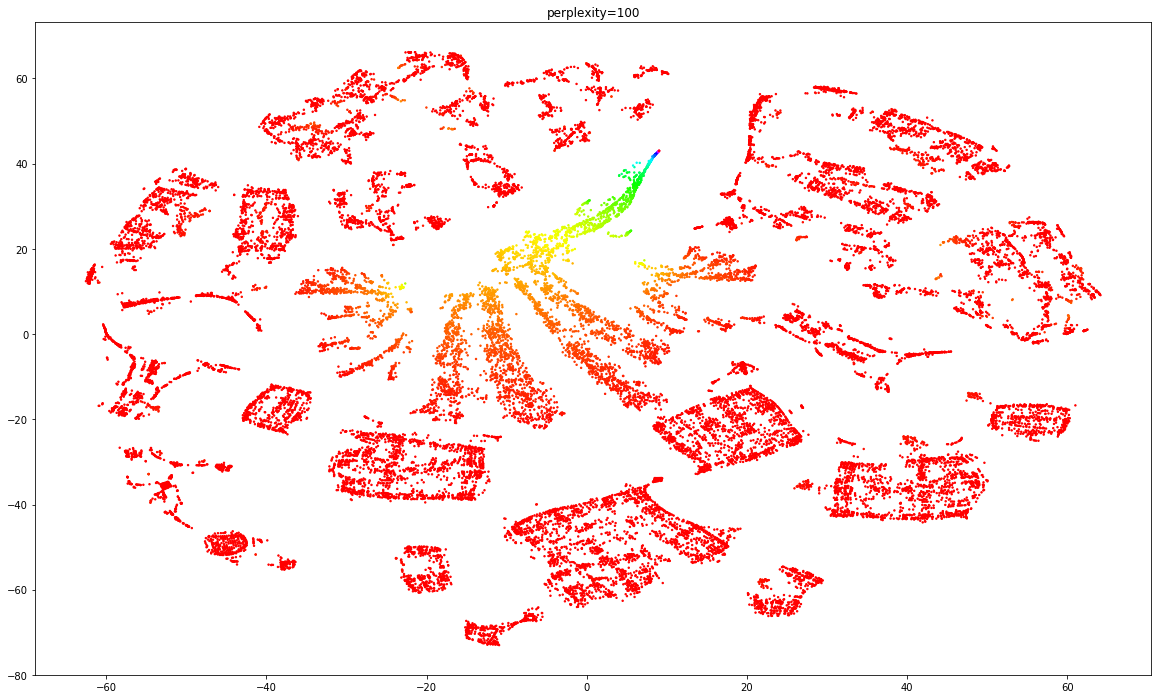

In [42]:
for perplex in perplexities:  
    fig = plt.figure(figsize=(20,12))
    tsne = manifold.TSNE(init='random', n_iter=1000,
                     random_state=0, perplexity=perplex, verbose=2, metric='euclidean')
    Y = tsne.fit_transform(X_scaled)
    plt.title("perplexity=%d" % perplex)
    plt.scatter(Y[:,0], Y[:, 1], c=X_scaled[:, 2], cmap='hsv', s=2)
    fig.savefig("graph_tsne_scaled_perplex_"+str(perplex)+".png")

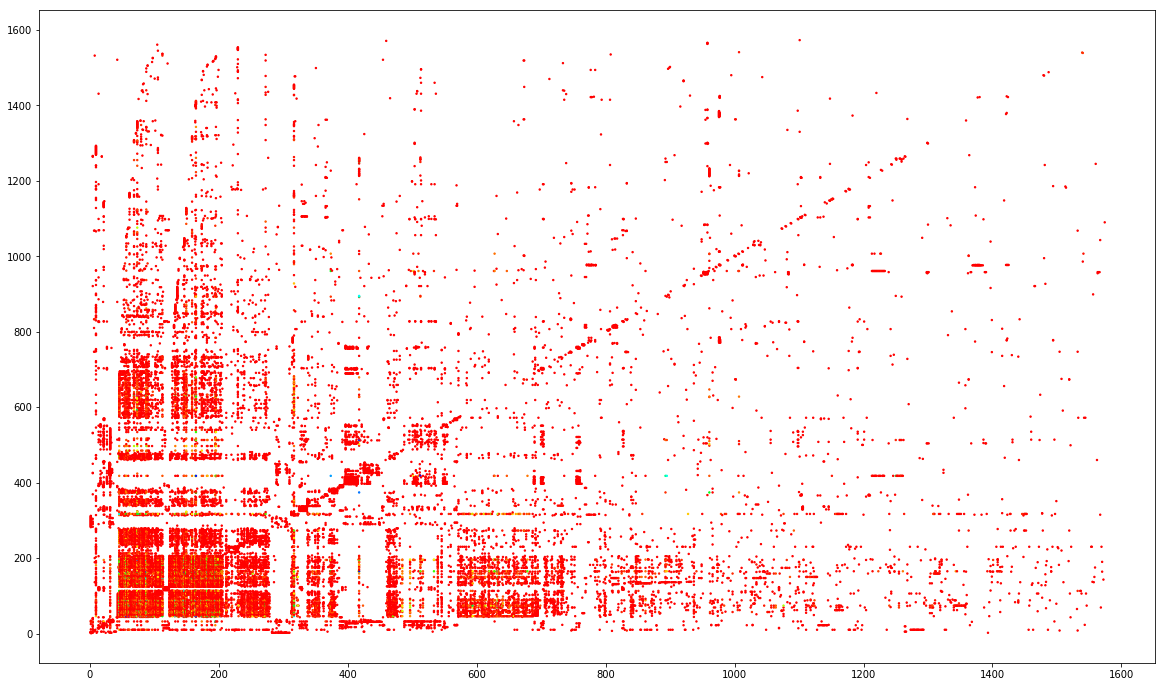

In [43]:
fig = plt.figure(figsize=(20,12))
plt.scatter(X[:,0], X[:, 1], c=X[:, 2], cmap='hsv', s=2)
fig.savefig("graph_original.png")